# Clifford Circuit Spectrum

In [36]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from kraus_channels import *
from experimental import *
from spam import *
from scipy.stats import gaussian_kde
from quantum_circuits import *
from analysis import *
from utils import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [37]:
model1 = loader(data_path("integrable_4qubit.model"))
d = model1.channel.d

np.random.seed(42)
random.seed(42)

circuit = integrabel_circuit(4, 4)
U = circuit_to_matrix(circuit)

channel_unitary = ChoiMapStatic(U, mode="unitary")
channel_diluted = DilutedKrausMap(U=U, c=0.49, kraus_part=KrausMap(d, rank=7))

C:\Users\krist\AppData\Local\Temp\ipykernel_2016\363936037.py:18: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001E364322B60> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["_", "Real Data", "Fitted Diluted Unitary", "Ideal Unitary"])


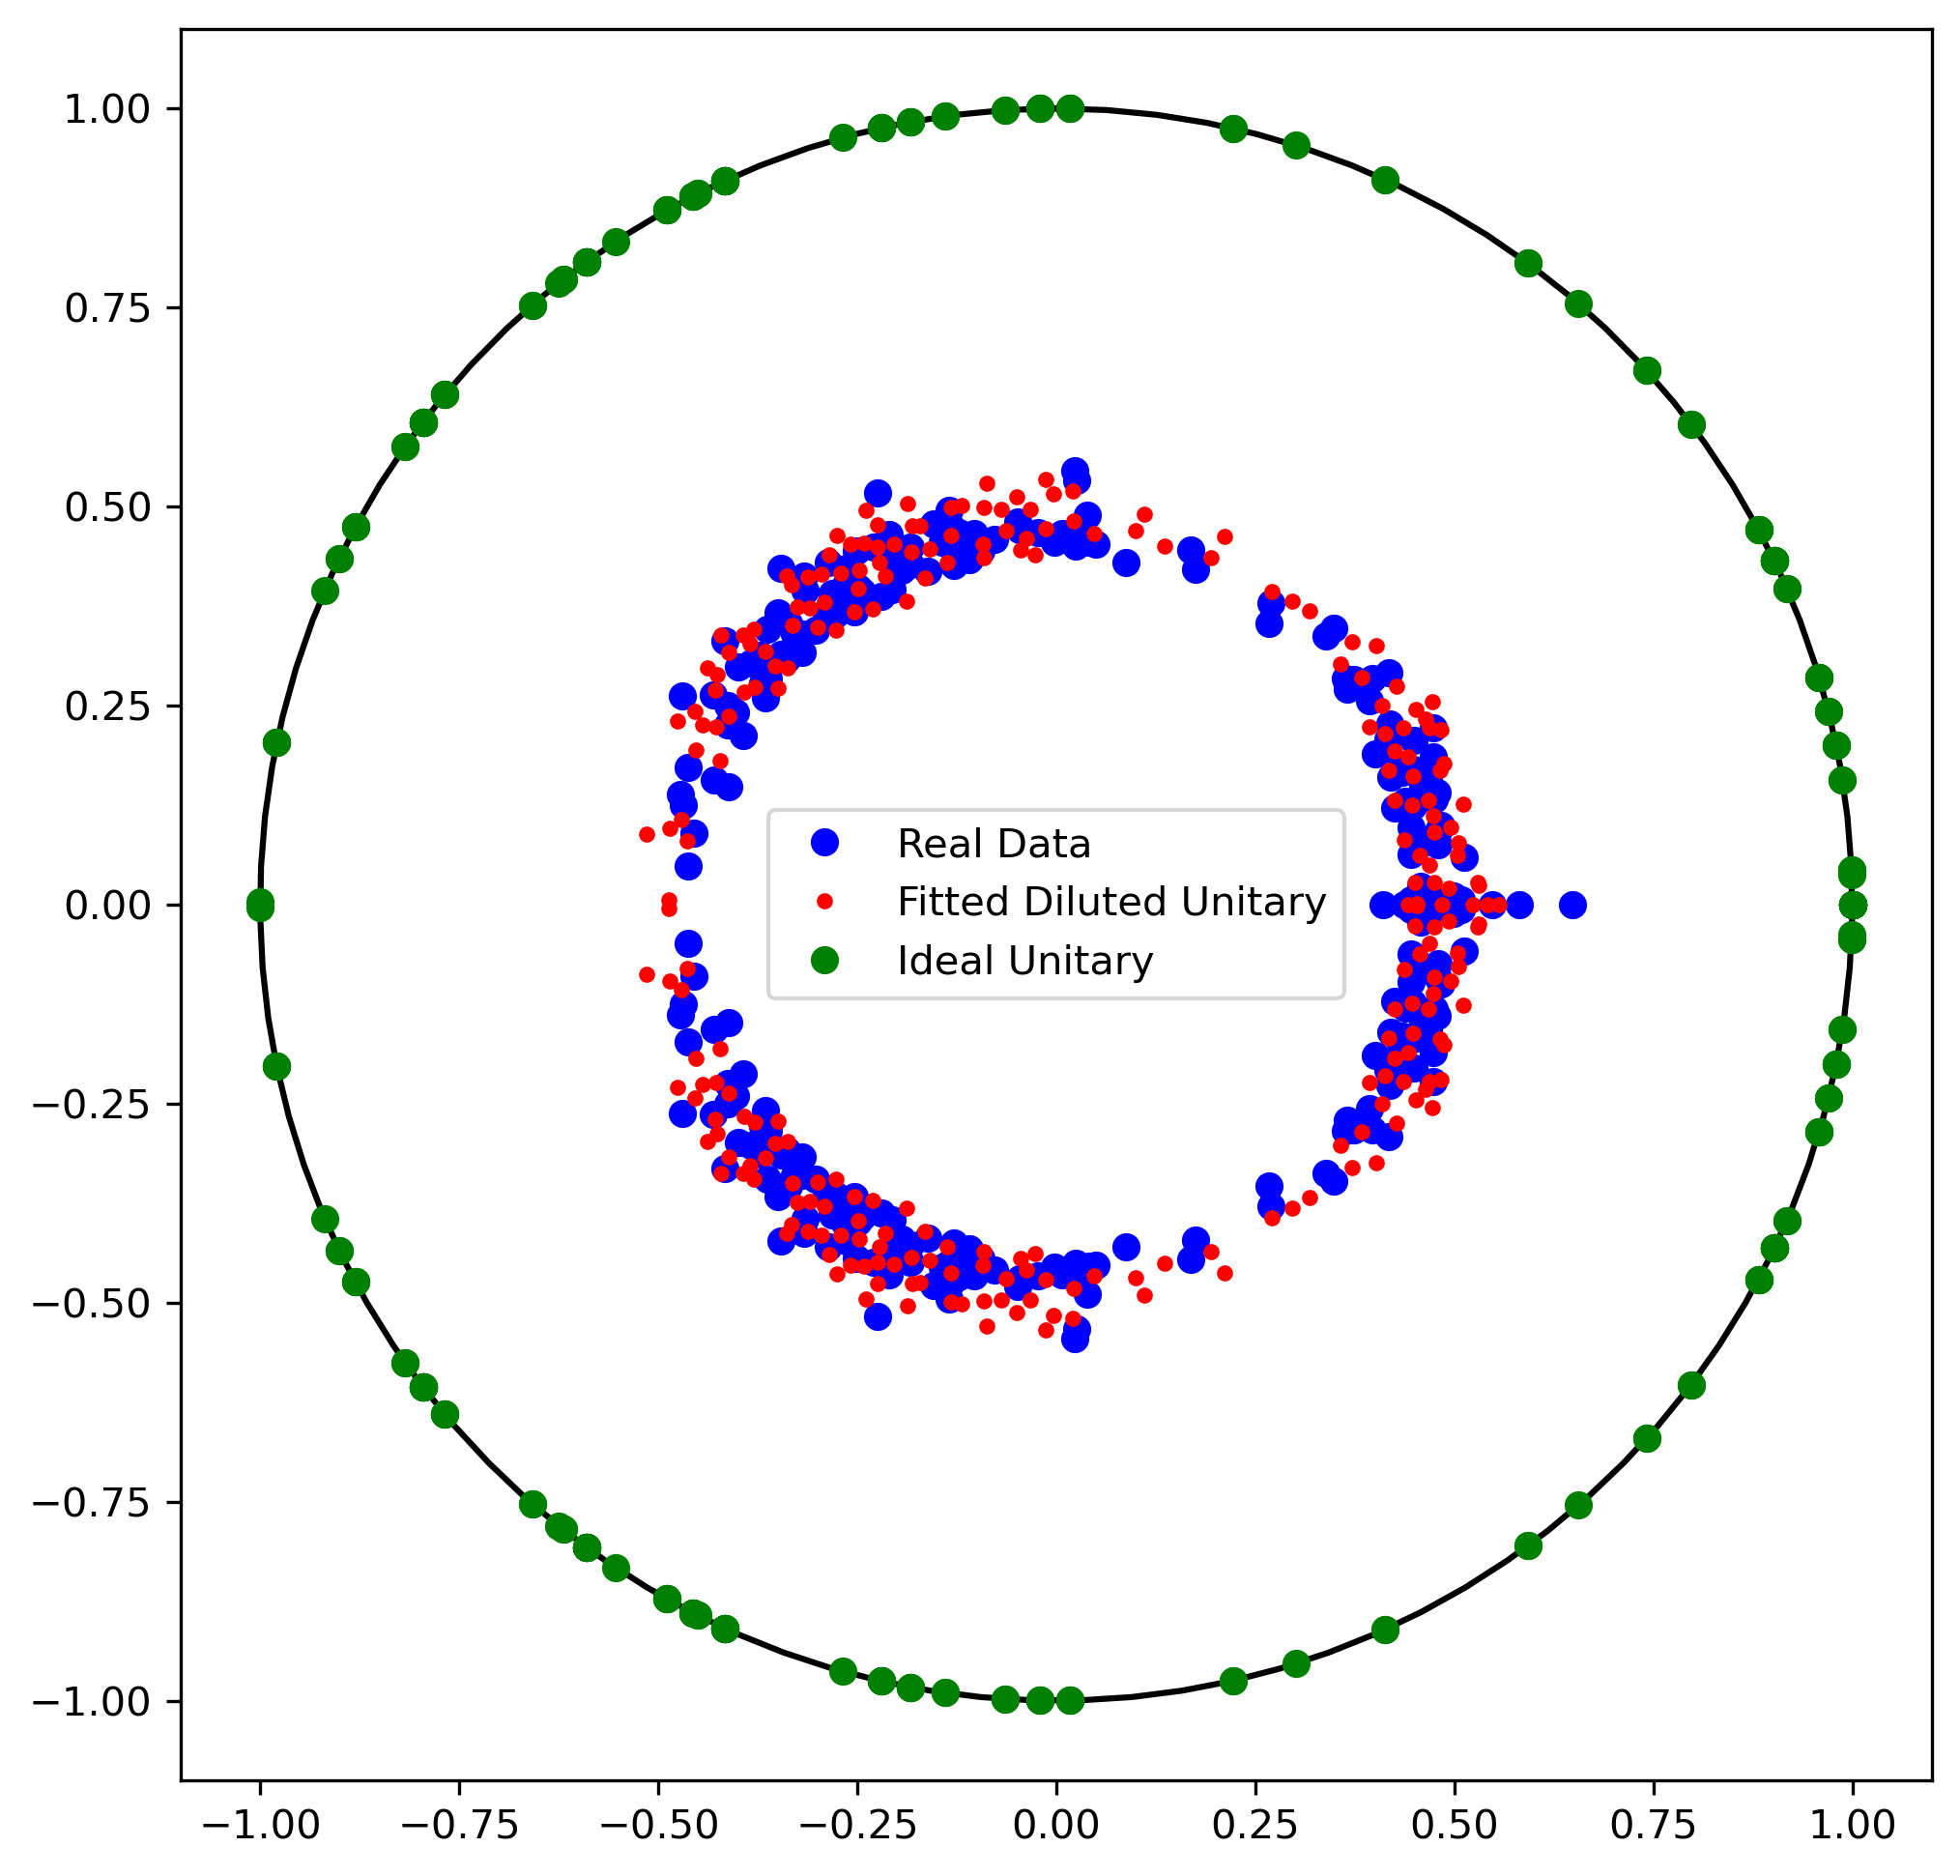

In [38]:
spectrum_model1 = channel_spectrum(model1.channel, use_coords=True)
spectrum_unitary1 = channel_spectrum(channel_unitary, use_coords=True)
spectrum_diluted1 = channel_spectrum(channel_diluted, use_coords=True)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum_model1[:,0], spectrum_model1[:,1], "bo")
plt.plot(spectrum_diluted1[:,0], spectrum_diluted1[:,1], "ro", markersize = 3)
plt.plot(spectrum_unitary1[:,0], spectrum_unitary1[:,1], "go")


plt.legend(["_", "Real Data", "Fitted Diluted Unitary", "Ideal Unitary"])

C:\Users\krist\AppData\Local\Temp\ipykernel_2016\363936037.py:18: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001E361034670> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["_", "Real Data", "Fitted Diluted Unitary", "Ideal Unitary"])


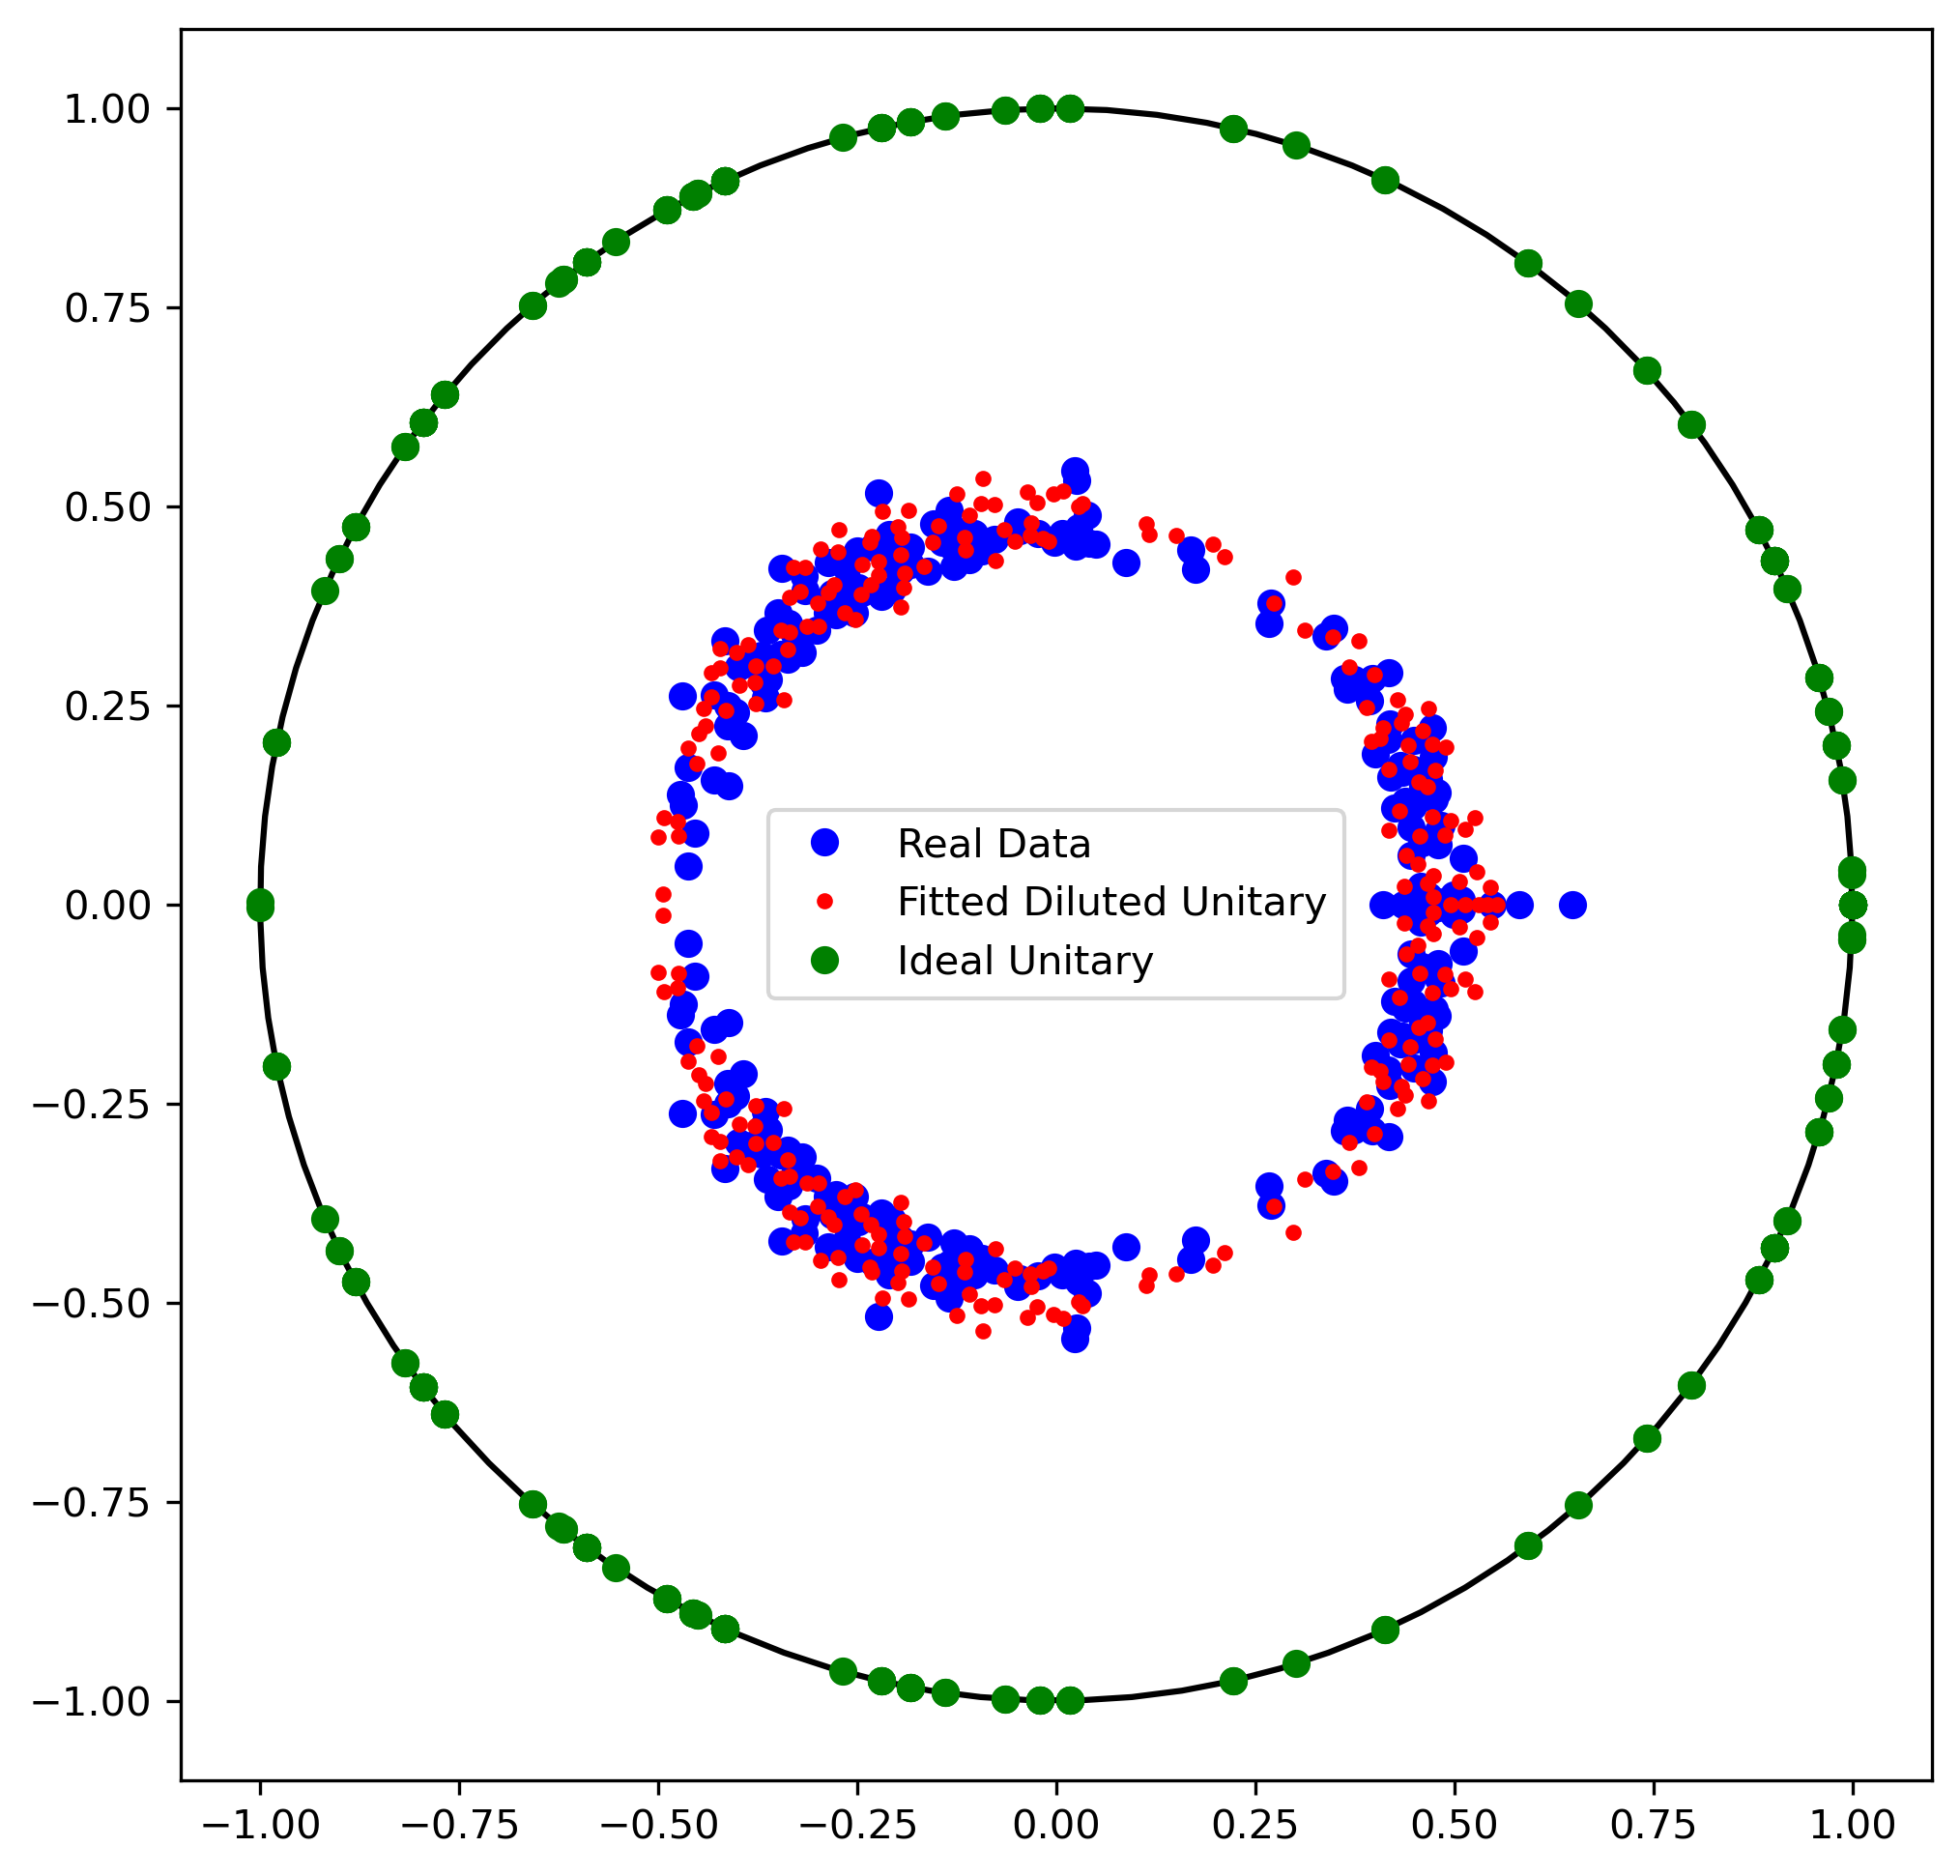

In [31]:
spectrum_model1 = channel_spectrum(model1.channel, use_coords=True)
spectrum_unitary1 = channel_spectrum(channel_unitary, use_coords=True)
spectrum_diluted1 = channel_spectrum(channel_diluted, use_coords=True)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum_model1[:,0], spectrum_model1[:,1], "bo")
plt.plot(spectrum_diluted1[:,0], spectrum_diluted1[:,1], "ro", markersize = 3)
plt.plot(spectrum_unitary1[:,0], spectrum_unitary1[:,1], "go")


plt.legend(["_", "Real Data", "Fitted Diluted Unitary", "Ideal Unitary"])

In [24]:
model2 = loader(data_path("nonintegrable_4qubit.model"))
d = model2.channel.d

np.random.seed(42)
random.seed(42)

circuit = nonintegrabel_circuit(4, 4)
U = circuit_to_matrix(circuit)

channel_unitary = ChoiMapStatic(U, mode="unitary")
channel_diluted = DilutedKrausMap(U=U, c=0.4, kraus_part=KrausMap(d, rank=11))

C:\Users\krist\AppData\Local\Temp\ipykernel_2016\571086972.py:18: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001E360D72950> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["_", "Real Data", "Fitted Diluted Unitary", "Ideal Unitary"])


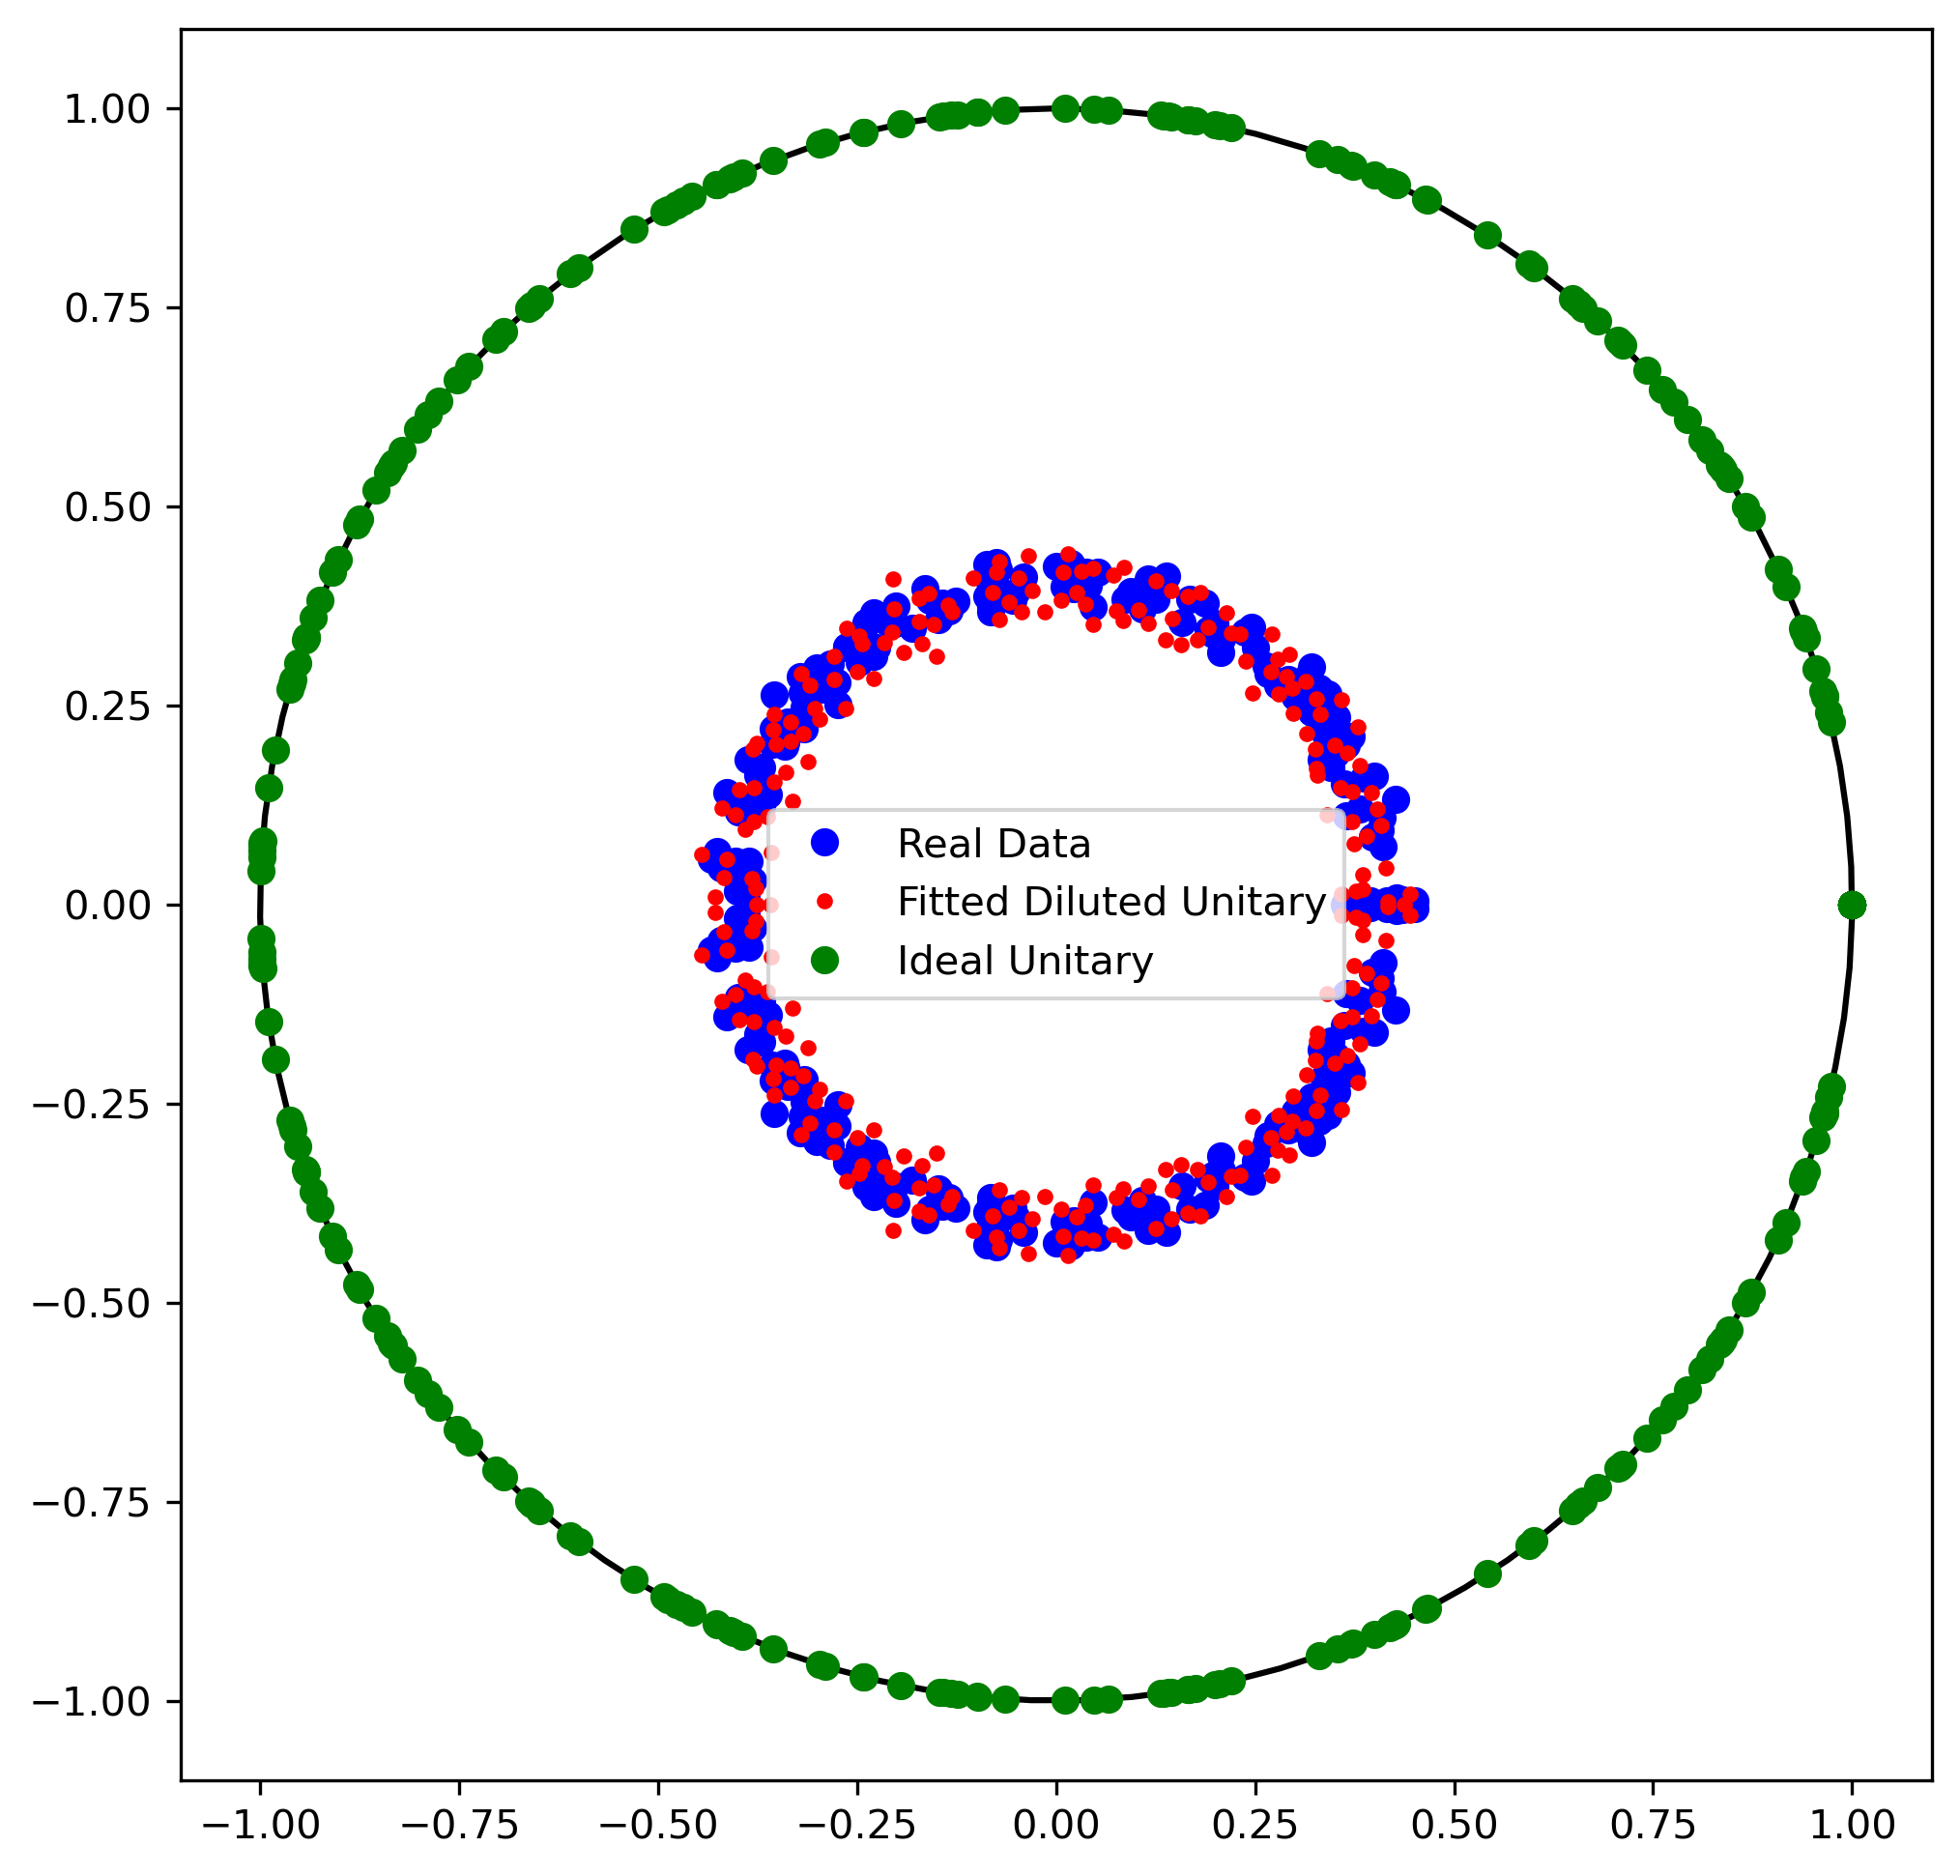

In [25]:
spectrum_model2 = channel_spectrum(model2.channel, use_coords=True)
spectrum_unitary2 = channel_spectrum(channel_unitary, use_coords=True)
spectrum_diluted2 = channel_spectrum(channel_diluted, use_coords=True)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum_model2[:,0], spectrum_model2[:,1], "bo")
plt.plot(spectrum_diluted2[:,0], spectrum_diluted2[:,1], "ro", markersize=3)
plt.plot(spectrum_unitary2[:,0], spectrum_unitary2[:,1], "go")


plt.legend(["_", "Real Data", "Fitted Diluted Unitary", "Ideal Unitary"])